In [1]:
from fastai.vision.all import *
import librosa
import librosa.display
from IPython.display import Audio

In [18]:
DATA = Path('../../data')
AUDIO_TAGGING = DATA/'freesound-audio-tagging'
AUDIO_RECORDINGS = AUDIO_TAGGING/'audio_train'
dst_path = DATA/'free-sound/train'
dst_path.ls()

(#41) [Path('../../data/free-sound/train/Saxophone'),Path('../../data/free-sound/train/Cello'),Path('../../data/free-sound/train/Meow'),Path('../../data/free-sound/train/Bus'),Path('../../data/free-sound/train/Laughter'),Path('../../data/free-sound/train/Chime'),Path('../../data/free-sound/train/Bark'),Path('../../data/free-sound/train/Burping_or_eructation'),Path('../../data/free-sound/train/Bass_drum'),Path('../../data/free-sound/train/Harmonica')...]

In [3]:
AUDIO_RECORDINGS.ls()

(#9473) [Path('../../data/freesound-audio-tagging/audio_train/2a871432.wav'),Path('../../data/freesound-audio-tagging/audio_train/704d6fc7.wav'),Path('../../data/freesound-audio-tagging/audio_train/f5729f4f.wav'),Path('../../data/freesound-audio-tagging/audio_train/84d0e459.wav'),Path('../../data/freesound-audio-tagging/audio_train/0b3c0588.wav'),Path('../../data/freesound-audio-tagging/audio_train/56a59a85.wav'),Path('../../data/freesound-audio-tagging/audio_train/f8742dce.wav'),Path('../../data/freesound-audio-tagging/audio_train/1f4a7bfe.wav'),Path('../../data/freesound-audio-tagging/audio_train/151b80e7.wav'),Path('../../data/freesound-audio-tagging/audio_train/c3015f33.wav')...]

In [19]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [20]:
dls = dblock.dataloaders(dst_path)

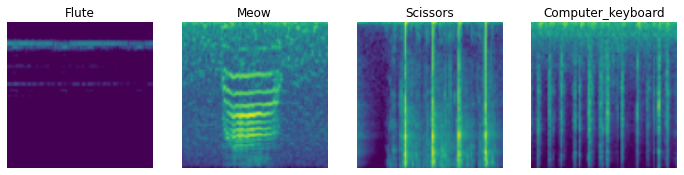

In [21]:
dls.valid.show_batch(max_n=4, nrows=1)

In [22]:
dls.one_batch()

(TensorImage([[[[0.2510, 0.2314, 0.2078,  ..., 0.2039, 0.2353, 0.2588],
           [0.1922, 0.1843, 0.1725,  ..., 0.1725, 0.1882, 0.2000],
           [0.1216, 0.1255, 0.1373,  ..., 0.1294, 0.1255, 0.1255],
           ...,
           [0.2667, 0.2667, 0.2667,  ..., 0.2667, 0.2667, 0.2667],
           [0.2667, 0.2667, 0.2667,  ..., 0.2667, 0.2667, 0.2667],
           [0.2667, 0.2667, 0.2667,  ..., 0.2667, 0.2667, 0.2667]],
 
          [[0.2667, 0.3098, 0.3647,  ..., 0.3686, 0.3020, 0.2510],
           [0.4118, 0.4471, 0.4902,  ..., 0.4510, 0.4157, 0.3882],
           [0.6039, 0.6275, 0.6549,  ..., 0.5608, 0.5647, 0.5686],
           ...,
           [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
           [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
           [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.5294, 0.5373, 0.5490,  ..., 0.5529, 0.5373, 0.5216],
           [0.5333, 0.5373, 0.5373,  ..., 0.5529, 0.5412, 0.5333],
           [0.5373,

In [23]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

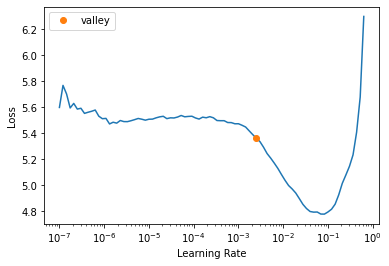

In [24]:
lr = learn.lr_find()

In [25]:
learn.fine_tune(8, lr.valley)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.477284,2.199074,0.570222,0.429778,00:08


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.348482,1.639305,0.446146,0.553854,00:11
1,1.860737,1.430063,0.395459,0.604541,00:11
2,1.551077,1.299564,0.362196,0.637804,00:11
3,1.318610,1.180426,0.319430,0.680570,00:11
4,1.072435,1.044312,0.280359,0.719641,00:11
5,0.864971,0.985468,0.272439,0.727561,00:11
6,0.728508,0.953857,0.261352,0.738648,00:11
7,0.635826,0.944774,0.250792,0.749208,00:11


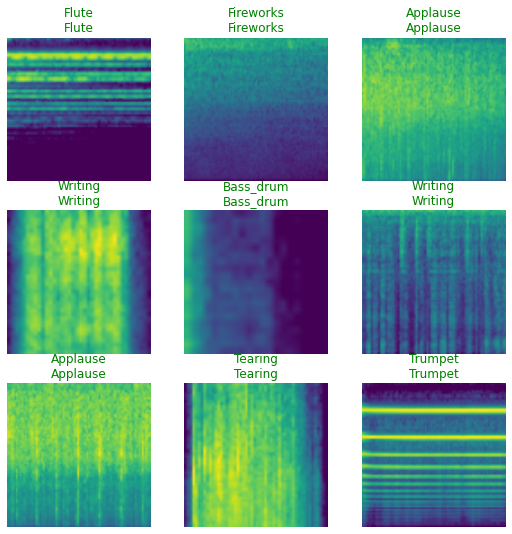

In [26]:
learn.show_results()

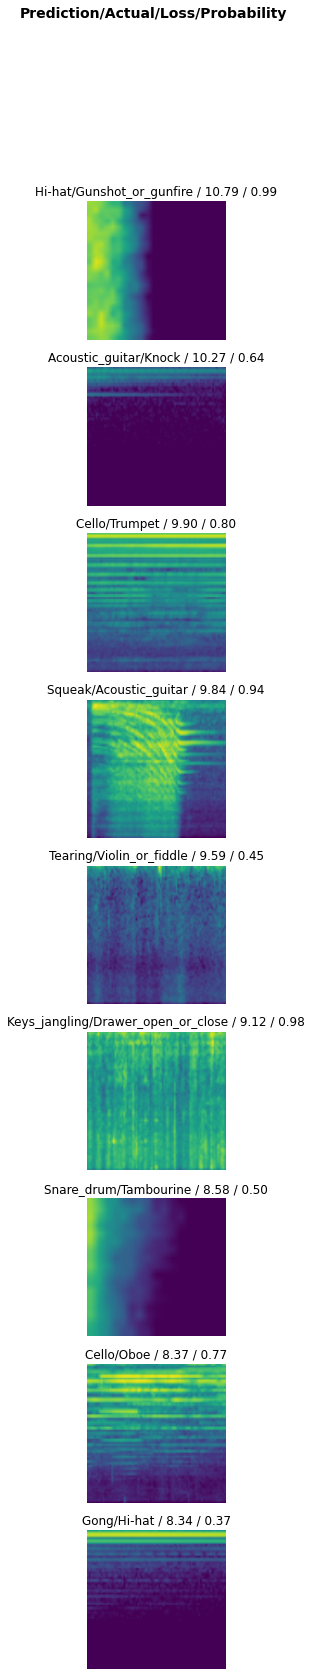

In [27]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9,nrows=9)

Gunshot_or_gunfire


Knock



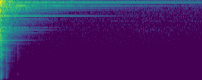

Trumpet



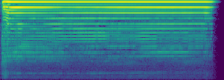

Acoustic_guitar



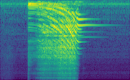

Violin_or_fiddle



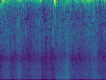

Drawer_open_or_close



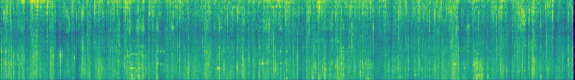

Tambourine


Oboe



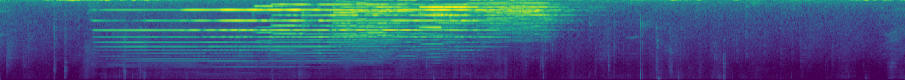

Hi-hat



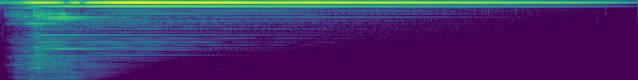

In [28]:
losses,idxs = interp.top_losses(9)
top_losses = [(dls.valid_ds.items[x]) for x in idxs]
for x in top_losses:
    filename = Path(x.name.split(".")[0])
    directory = dst_path / x.parent.name
    for file in os.listdir(directory):
        if str(filename) in file:
            print(f'{x.parent.name}')
            display(Audio(directory/file))

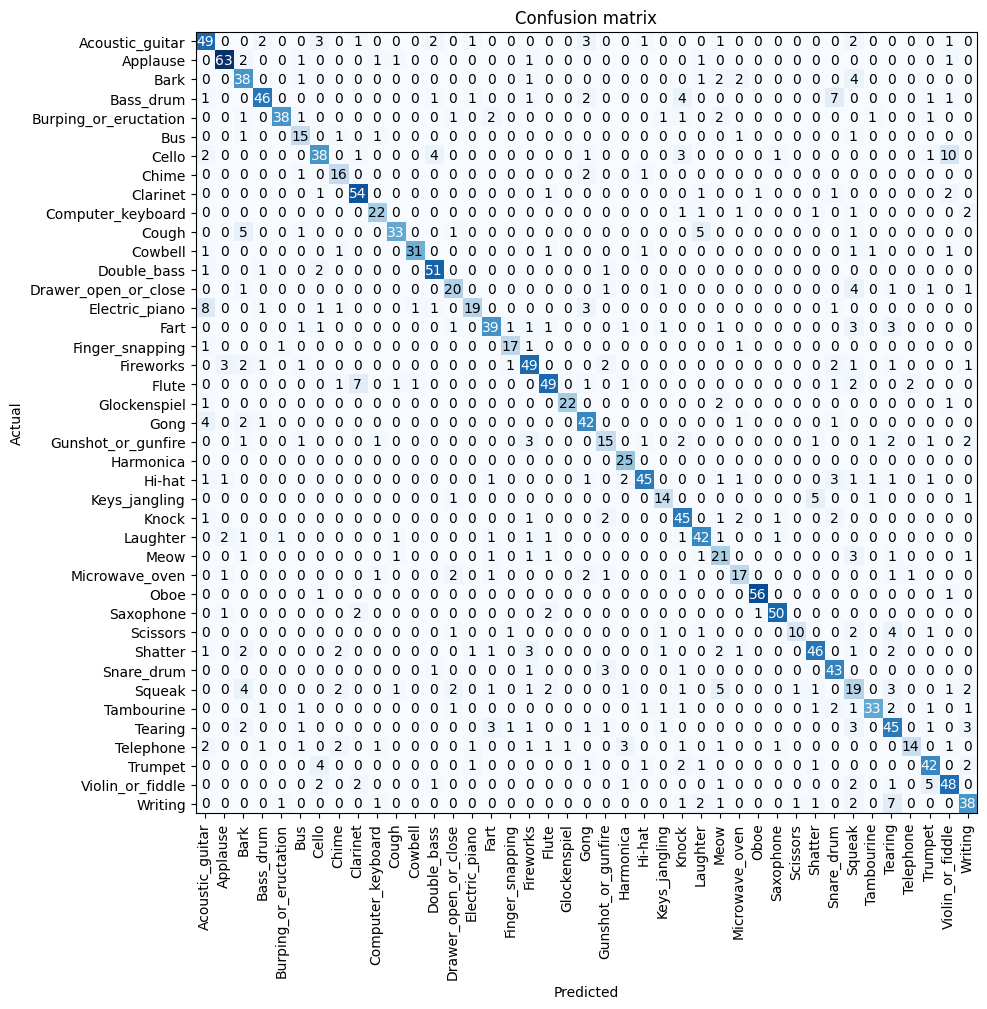

In [29]:
a = ClassificationInterpretation.from_learner(learn)
a.plot_confusion_matrix(figsize=(10,10), dpi = 100)

In [30]:
learn.export('../models/model_V2.pkl')